<a href="https://colab.research.google.com/github/vanikanoria/DeepLearning_Fall2021/blob/main/DeepLearning_VaniKanoria_ProjectMilestone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (BatchNormalization, 
                                     LeakyReLU, 
                                     Reshape, 
                                     Conv2DTranspose,
                                     Conv2D,
                                     Dropout,
                                     Flatten)

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import pandas as pd

# Load data

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#link - https://github.com/zalandoresearch/fashion-mnist
#The data is already been sorted into training and testing for us

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

#Create a small list so we can read the label as well
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandle', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
train_data, train_labels

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [ ]:
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1).astype('float32')

In [ ]:
train_data

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
#convert training data and labels to pandas dataframe
#train_data = pd.DataFrame(np.concatenate(train_data))
#train_data
#train_labels = pd.DataFrame(train_labels)

In [ ]:
#convert testing data and labels to pandas dataframe
test_data = pd.DataFrame(np.concatenate(test_data))
test_labels = pd.DataFrame(test_labels)
test_data, test_labels


(        0   1   2   3   4   5   6   7   8   ...  19  20  21  22  23  24  25  26  27
 0        0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
 1        0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
 2        0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
 3        0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
 4        0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
 ...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
 279995   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
 279996   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
 279997   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
 279998   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
 279999   0   0   0   0   0   0   0   0   0  ...   0   0   0   0 

train_data and test_data parts contain greyscale RGB codes (from 0 to 255) while train_labels and test_labels parts contain labels from 0 to 9 which represents which number they actually are.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


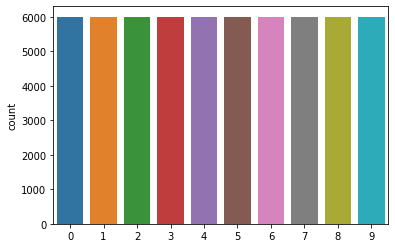

In [ ]:
import seaborn as sns
sns.countplot(train_labels)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


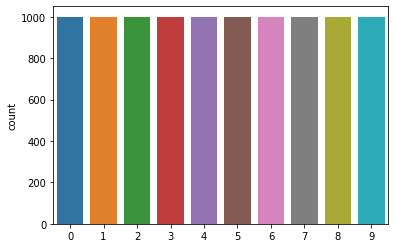

In [ ]:
sns.countplot(test_labels)

There are 1000 of each type of fashion item in the train and test sets respectively.

Since we are doing an unsupervised learning task, we will not need label values at the moment. 

We also need to convert our dataset to 4-dimensions with the reshape function. Finally, we convert our pandas dataframe to a TensorFlow Dataset object for more efficient training.

In [ ]:
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1).astype('float32')

In [ ]:
# Normalize the images to [-1, 1]
train_data = (train_data - 127.5) / 127.5 

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
train_dataset

<BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>

# Build the model
## Generator Network
Our generator network is responsible for generating 28x28 pixels grayscale fake images from random noise. Therefore, it needs to accept 1-dimensional arrays and output 28x28 pixels images. For this task, we need Transposed Convolution layers after reshaping our 1-dimensional array to a 2-dimensional array. Transposed Convolution layers can increase the size of a smaller array. We also take advantage of BatchNormalization and LeakyReLU layers. The below lines create a function which would generate a generator network with Keras Sequential API.


In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

In [ ]:
generator = make_generator_model()

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)        5

Now that we have our generator network, we can easily generate a sample image with the following code:

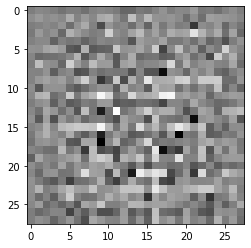

In [ ]:
# Create a random noise and generate a sample
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
# Visualize the generated sample
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

It is just plain noise. But, the fact that it can create an image from a random noise array proves its potential.

## Discriminator Network

For our discriminator network, we need to follow the inverse version of our generator network. It takes the 28x28 pixels image data and outputs a single value, representing the possibility of authenticity. So, our discriminator can review whether a sample image generated by the generator is fake.

We follow the same method that we used to create a generator network, The following lines create a function that would create a discriminator model using Keras Sequential API:


In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    
    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1))

    return model

In [ ]:
discriminator = make_discriminator_model()

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

Finally, we can check what our non-trained discriminator says about the sample generated by the non-trained generator:

In [ ]:
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00127152]], shape=(1, 1), dtype=float32)


A negative value shows that our non-trained discriminator concludes that the image sample in Figure 8 is fake. 

# Configure the model

Since we are training two sub-networks inside a GAN network, we need to define two loss functions and two optimizers.

### Loss Functions: 
We start by creating a Binary Crossentropy object from tf.keras.losses module. We also set the from_logits parameter to True. After creating the object, we fill them with custom discriminator and generator loss functions. Our discriminator loss is calculated as a combination of (i) the discriminator’s predictions on real images to an array of ones and (ii) its predictions on generated images to an array of zeros. Our generator loss is calculated by measuring how well it was able to trick the discriminator. Therefore, we need to compare the discriminator’s decisions on the generated images to an array of 1s.


In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

Optimizers: We also set two optimizers separately for generator and discriminator networks. We can use the Adam optimizer object from tf.keras.optimizers module.


In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### Set the checkpoints:
By setting a checkpoint directory, we can save our progress at every epoch. This will be especially useful when we restore our model from the last epoch. The following lines configure the training checkpoints by using the os library to set a path to save all the training steps

In [ ]:
import os

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# Train the Model

In [ ]:
#create the required variables
EPOCHS = 60
# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
num_examples_to_generate = 16
noise_dim = 100
seed = tf.random.normal([num_examples_to_generate, noise_dim])

Our seed is the noise that we use to generate images on top of. The code generates a random array with normal distribution with the shape (16, 100)

## Define the Training Step

We are setting a custom training step. After defining the custom train_step() function by annotating the tf.function module, our model will be trained based on the custom train_step() function we defined.

### tf.function: 
Compiles a function into a callable TensorFlow graph. (deprecated arguments)

### tf.GradientTape:
 TensorFlow provides the tf.GradientTape API for automatic differentiation; that is, computing the gradient of a computation with respect to some inputs, usually tf.Variables. TensorFlow "records" relevant operations executed inside the context of a tf.GradientTape onto a "tape". TensorFlow then uses that tape to compute the gradients of a "recorded" computation using reverse mode differentiation.


In [ ]:
# tf.function annotation causes the function 
# to be "compiled" as part of the training
@tf.function # Compiles a function into a callable TensorFlow graph. (deprecated arguments)

def train_step(images):
  
    # 1 - Create a random noise to feed it into the model
    # for the image generation
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
    # 2 - Generate images and calculate loss values
    # GradientTape method records operations for automatic differentiation.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    # 3 - Calculate gradients using loss values and model variables
    # "gradient" method computes the gradient using 
    # operations recorded in context of this tape (gen_tape and disc_tape).
    
    # It accepts a target (e.g., gen_loss) variable and 
    # a source variable (e.g.,generator.trainable_variables)
    # target --> a list or nested structure of Tensors or Variables to be differentiated.
    # source --> a list or nested structure of Tensors or Variables.
    # target will be differentiated against elements in sources.

    # "gradient" method returns a list or nested structure of Tensors  
    # (or IndexedSlices, or None), one for each element in sources. 
    # Returned structure is the same as the structure of sources.
    gradients_of_generator = gen_tape.gradient(gen_loss, 
                                               generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, 
                                                discriminator.trainable_variables)
    
    # 4 - Process  Gradients and Run the Optimizer
    # "apply_gradients" method processes aggregated gradients. 
    # ex: optimizer.apply_gradients(zip(grads, vars))
    """
    Example use of apply_gradients:
    grads = tape.gradient(loss, vars)
    grads = tf.distribute.get_replica_context().all_reduce('sum', grads)
    # Processing aggregated gradients.
    optimizer.apply_gradients(zip(grads, vars), experimental_aggregate_gradients=False)
    """
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

## Define the Training Loop
We define a function, named train, for our training loop. Not only we run a for loop to iterate our custom training step over the MNIST, but also do the following with a single function:

During the Training:
- Start recording time spent at the beginning of each epoch;

- Produce GIF images and display them,

- Save the model every five epochs as a checkpoint,

- Print out the completed epoch time; and

- Generate a final image in the end after the training is completed.


In [ ]:
import time
from IPython import display # A command shell for interactive computing in Python.

def train(dataset, epochs):
  # A. For each epoch, do the following:
  for epoch in range(epochs):
    start = time.time()
    # 1 - For each batch of the epoch, 
    for image_batch in dataset:
      # 1.a - run the custom "train_step" function
      # we just declared above
      train_step(image_batch)

    # 2 - Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # 3 - Save the model every 5 epochs as 
    # a checkpoint, which we will use later
    if (epoch + 1) % 5 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    # 4 - Print out the completed epoch no. and the time spent
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # B. Generate a final image after the training is completed
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)


## Image Generation Function
In the train function, there is a custom image generation function that we haven’t defined yet. Our image generation function does the following tasks:
- Generate images by using the model;
- Display the generated images in a 4x4 grid layout using matplotlib;
- Save the final figure in the end

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  # 1 - Generate images
  predictions = model(test_input, training=False)
  # 2 - Plot the generated images
  fig = plt.figure(figsize=(4,4))
  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
  # 3 - Save the generated images
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

# Start the Training

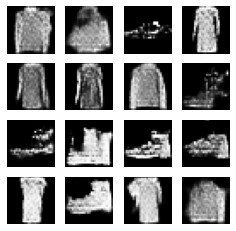

In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
# restore the values from the latest checkpoint:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

We can also view the evolution of our generative GAN model by viewing the generated 4x4 grid with 16 sample digits for any epoch with the following code:

In [ ]:
# PIL is a library which may open different image file formats
import PIL 
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))
display_image(EPOCHS)

or better yet, let's create a GIF image visualizing the evolution of the samples generated by our GAN with the following code:


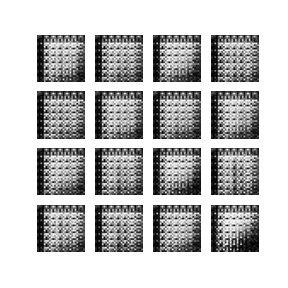

In [ ]:
import glob # The glob module is used for Unix style pathname pattern expansion.
import imageio # The library that provides an easy interface to read and write a wide range of image data

anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  # image = imageio.imread(filename)
  # writer.append_data(image)
  
display.Image(open('dcgan.gif','rb').read())